# Import Data

In [ ]:
#Import Library
import pandas as pd
import numpy as np
import nltk
import string
import re
import seaborn as sns
from sklearn.metrics import classification_report
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load data csv
Data = pd.read_csv("drive/MyDrive/Colab Notebooks/U17_all.csv")

In [ ]:
#mengambil data berdasarkan kolom yang dibutuhkan
DataPrepro = pd.DataFrame(Data[['tweet']])
DataPrepro.head()

,tweet
0,Radja Nainggolan Beri Semangat Para Pemain Tim...
1,Piala Dunia U17 ternyata seru banget. Iran kal...
2,Penampilan gugup Timnas Indonesia U-17 dalam l...
3,Lolos fase berikutnya. PERSEBAYA U-17 Piala So...
4,Jadwal Piala Dunia U-17 2023 hari ini https://...


In [ ]:
DataPrepro = DataPrepro.dropna()

In [ ]:
#melihat informasi data
DataPrepro.isnull().sum().sum()

0

In [ ]:
DataPrepro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   2356 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


In [ ]:
def  clean_text(DataPrepro, new_text_field_name):
    #menghapus karakter, number, emoji, link menggunakan regex
    DataPrepro[new_text_field_name] = DataPrepro[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    DataPrepro[new_text_field_name] = DataPrepro[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return DataPrepro

In [ ]:
data_clean = clean_text(DataPrepro, 'tweet') #menambahkan hasil text_clean ke variabel data_clean
data_clean


,tweet
0,Radja Nainggolan Beri Semangat Para Pemain Tim...
1,Piala Dunia U ternyata seru banget Iran kalahk...
2,Penampilan gugup Timnas Indonesia U dalam laga...
3,Lolos fase berikutnya PERSEBAYA U Piala Soeratin
4,Jadwal Piala Dunia U hari ini
...,...
2351,Dito Ariotedjo menyampaikan penyelenggaraan Pi...
2352,Karier Peraih Sepatu Emas Piala Dunia U yang ...
2353,Electrizen PLN berkomitmen untuk menyukseskan ...
2354,Apresiasi yang layak diberikan untuk Indonesi...


# Pelabelan Data

In [ ]:
data_label = pd.DataFrame(data_clean[['tweet']])
data_label

,tweet
0,Radja Nainggolan Beri Semangat Para Pemain Tim...
1,Piala Dunia U ternyata seru banget Iran kalahk...
2,Penampilan gugup Timnas Indonesia U dalam laga...
3,Lolos fase berikutnya PERSEBAYA U Piala Soeratin
4,Jadwal Piala Dunia U hari ini
...,...
2351,Dito Ariotedjo menyampaikan penyelenggaraan Pi...
2352,Karier Peraih Sepatu Emas Piala Dunia U yang ...
2353,Electrizen PLN berkomitmen untuk menyukseskan ...
2354,Apresiasi yang layak diberikan untuk Indonesi...


In [ ]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=b44b043480d7b84ae3b67ab69008c58fac8ee8a9af41f49333e93590e7616f83
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succe

In [ ]:
#import library yang dibutuhkan
import googletrans
from googletrans import Translator

In [ ]:
translator = Translator()
translations = {}
#melakukan translate pada text steamindo
for column in data_label.columns:
  unique_element = data_label['tweet'].unique()
  for element in unique_element:
    translations[element] = translator.translate(element).text
  translations

In [ ]:
data_label.replace(translations, inplace = True) #mengubah ke tabel
data_label.head()

,tweet
0,Radja Nainggolan Encourages World Cup U Nation...
1,The U World Cup turned out to be really exciti...
2,The nervous appearance of the Indonesia U Nati...
3,Qualified for the next phase of the PERSEBAYA ...
4,Today's U World Cup schedule


In [ ]:
!pip install VaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
#import library dan memanggil fungsi
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
score = [analyser.polarity_scores(x) for x in data_label['tweet']] #membuat score
data_label['Compound_Score'] = [x['compound'] for x in score] #mencari nilai compound score
data_label.head()

,tweet,Compound_Score
0,Radja Nainggolan Encourages World Cup U Nation...,0.4404
1,The U World Cup turned out to be really exciti...,0.3167
2,The nervous appearance of the Indonesia U Nati...,-0.2732
3,Qualified for the next phase of the PERSEBAYA ...,0.0000
4,Today's U World Cup schedule,0.0000


In [ ]:
#klasifikasi compound score menjadi sentiment
data_label.loc[data_label['Compound_Score'] <= 0, 'Sentiment'] = 'Negatif'
data_label.loc[data_label['Compound_Score'] > 0, 'Sentiment'] = 'Positif'
data_label.head()

,tweet,Compound_Score,Sentiment
0,Radja Nainggolan Encourages World Cup U Nation...,0.4404,Positif
1,The U World Cup turned out to be really exciti...,0.3167,Positif
2,The nervous appearance of the Indonesia U Nati...,-0.2732,Negatif
3,Qualified for the next phase of the PERSEBAYA ...,0.0000,Negatif
4,Today's U World Cup schedule,0.0000,Negatif


In [ ]:
data_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet           2356 non-null   object 
 1   Compound_Score  2356 non-null   float64
 2   Sentiment       2356 non-null   object 
dtypes: float64(1), object(2)
memory usage: 55.3+ KB


In [ ]:
Sentiment = data_label.groupby(['Sentiment']).count().reset_index()
Sentiment['Jumlah'] =Sentiment['tweet']
Sentiment = Sentiment.drop(['tweet', 'Compound_Score'], axis=1)
Sentiment.head()

,Sentiment,Jumlah
0,Negatif,1073
1,Positif,1283


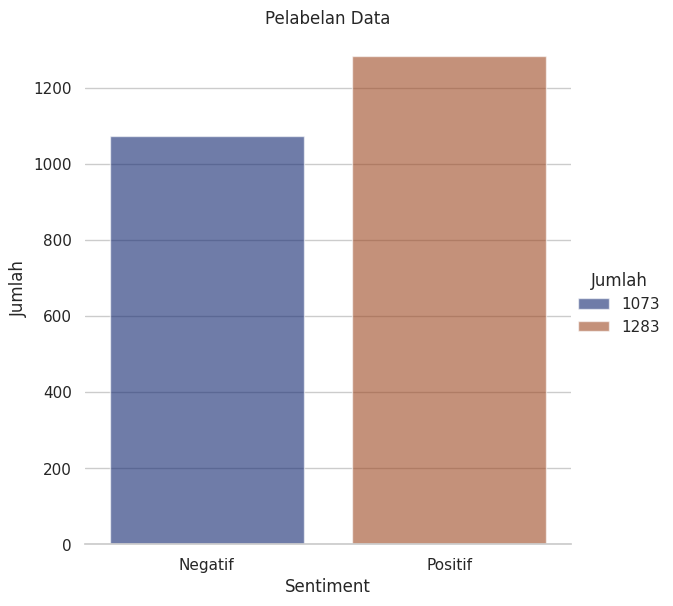

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=Sentiment, kind="bar",
    x="Sentiment", y="Jumlah", hue="Jumlah",
    errorbar="sd", palette="dark", alpha=.6, height=6
).set(title='Pelabelan Data')
g.despine(left=True)
g.set_axis_labels("Sentiment", "Jumlah")
plt.savefig("%s.png"%'pelabelan') #menyimpan kedalam png

In [ ]:
data_label = pd.DataFrame(data_label[['Sentiment']])
data_clean = pd.DataFrame(data_clean[['tweet']])
print(data_label)
print(data_clean)

     Sentiment
0      Positif
1      Positif
2      Negatif
3      Negatif
4      Negatif
...        ...
2351   Positif
2352   Positif
2353   Positif
2354   Positif
2355   Positif

[2356 rows x 1 columns]
                                                  tweet
0     Radja Nainggolan Beri Semangat Para Pemain Tim...
1     Piala Dunia U ternyata seru banget Iran kalahk...
2     Penampilan gugup Timnas Indonesia U dalam laga...
3     Lolos fase berikutnya PERSEBAYA U Piala Soeratin 
4                       Jadwal Piala Dunia U  hari ini 
...                                                 ...
2351  Dito Ariotedjo menyampaikan penyelenggaraan Pi...
2352  Karier  Peraih Sepatu Emas Piala Dunia U yang ...
2353  Electrizen PLN berkomitmen untuk menyukseskan ...
2354   Apresiasi yang layak diberikan untuk Indonesi...
2355   Selamat atas kesuksesan penyelenggaraan Piala...

[2356 rows x 1 columns]


In [ ]:
pelabelan = pd.concat([data_clean, data_label], axis=1, join='inner')
pelabelan.head()

,tweet,Sentiment
0,Radja Nainggolan Beri Semangat Para Pemain Tim...,Positif
1,Piala Dunia U ternyata seru banget Iran kalahk...,Positif
2,Penampilan gugup Timnas Indonesia U dalam laga...,Negatif
3,Lolos fase berikutnya PERSEBAYA U Piala Soeratin,Negatif
4,Jadwal Piala Dunia U hari ini,Negatif


In [ ]:
pelabelan.to_csv('u17_all_labeled.csv')

In [ ]:
negatif = pelabelan.groupby(['Sentiment']).get_group('Negatif')
negatif.to_csv("sentimen_negatif.csv")

negatif

<ipython-input-25-5b9387a8be5c>:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  negatif = pelabelan.groupby(['Sentiment']).get_group('Negatif')


,tweet,Sentiment
2,Penampilan gugup Timnas Indonesia U dalam laga...,Negatif
3,Lolos fase berikutnya PERSEBAYA U Piala Soeratin,Negatif
4,Jadwal Piala Dunia U hari ini,Negatif
5,Anjir argentina u aja udah tatoan full selengan,Negatif
7,PK for secs,Negatif
...,...,...
2250,Fifa Kritik PSSI Pada Penyelenggaraan Piala Du...,Negatif
2290,id Indonesia memang layak menjadi tuan rumah P...,Negatif
2320,Ada kemauan banyak jalan Enggak ada kemauan b...,Negatif
2344,Mali u nolu bebe,Negatif


In [ ]:
positif = pelabelan.groupby(['Sentiment']).get_group('Positif')
positif.to_csv("sentimen_positif.csv")

positif

<ipython-input-26-50933f2cb1bb>:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  positif = pelabelan.groupby(['Sentiment']).get_group('Positif')


,tweet,Sentiment
0,Radja Nainggolan Beri Semangat Para Pemain Tim...,Positif
1,Piala Dunia U ternyata seru banget Iran kalahk...,Positif
6,Nih stadion paling mateng sih emang buat pial...,Positif
8,Timnas Iran U secara fantastis membalikkan kea...,Positif
10,Foto Juara Bertahan Tumbang Timnas Brasil U Ke...,Positif
...,...,...
2351,Dito Ariotedjo menyampaikan penyelenggaraan Pi...,Positif
2352,Karier Peraih Sepatu Emas Piala Dunia U yang ...,Positif
2353,Electrizen PLN berkomitmen untuk menyukseskan ...,Positif
2354,Apresiasi yang layak diberikan untuk Indonesi...,Positif
